In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/kaggle_data/train.csv'

data_train = pd.read_csv(path)

In [0]:
path = '/content/drive/My Drive/kaggle_data/test.csv'

data_test = pd.read_csv(path)

In [7]:
data_train.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [87]:
train_images = data_train.iloc[:,1:].values.reshape(-1, 28, 28, 1) / 255
train_images.shape


(42000, 28, 28, 1)

In [88]:
data_test.head()

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]

In [89]:
test_images = np.array(data_test).reshape(-1, 28, 28, 1) / 255
test_images.shape

(28000, 28, 28, 1)

In [90]:
from sklearn.model_selection import train_test_split

labels=pd.get_dummies(data_train.iloc[:,0]).values
print(labels.shape)


X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.2, random_state=42)

(42000, 10)


In [0]:
import keras.layers as L
import keras
from keras.losses import categorical_crossentropy

In [0]:
from keras.preprocessing.image import ImageDataGenerator

aug_data=ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)


generator=aug_data.flow(X_train, y_train, batch_size=64)

In [0]:
def build_model():
  input_layer = L.Input(shape=[28, 28, 1])
  
  conv_depth = 5
  dense_width = 64
  dropout = 0.2
  
  layer = input_layer
  
  layer = L.Conv2D(32, (5, 5), input_shape=(28, 28, 1))(layer)
  layer = L.BatchNormalization(axis=1)(layer)
  
  layer = L.MaxPool2D((2, 2))(layer)
  layer = L.Dropout(dropout)(layer)
  
  layer = L.Conv2D(64, (3, 3))(layer)
  layer = L.BatchNormalization(axis=1)(layer)
  
  layer = L.MaxPool2D((2, 2))(layer)
  layer = L.Dropout(dropout)(layer)
  
  layer = L.Conv2D(128, (3, 3))(layer)
  layer = L.BatchNormalization(axis=1)(layer)
  
  layer = L.MaxPool2D((2, 2))(layer)
  layer = L.Dropout(dropout)(layer)
  
  layer = L.Flatten()(layer)
  
  
  layer = L.Dense(512)(layer)
  
  layer = L.Dropout(0.4)(layer)
    
  layer = L.Dense(10, activation='softmax')(layer)
  
  model = keras.models.Model(inputs=input_layer, outputs=[layer])
  model.compile('adam', loss=categorical_crossentropy, metrics=['accuracy'])
  
  return model
    

    
    
    

In [125]:
model = build_model()

model.summary()

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_218 (Bat (None, 24, 24, 32)        96        
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_167 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_219 (Bat (None, 10, 10, 64)        40 

In [128]:

steps = data_train.shape[0] // 64
epochs = 40

print(X_val.shape, y_val.shape)

history = model.fit_generator(generator, epochs=epochs, validation_data=(X_val, y_val), steps_per_epoch=steps)

(8400, 28, 28, 1) (8400, 10)
Epoch 1/40
656/656 [==============================] - 21s 32ms/step - loss: 0.0922 - acc: 0.9723 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 2/40
656/656 [==============================] - 21s 32ms/step - loss: 0.0861 - acc: 0.9740 - val_loss: 0.0320 - val_acc: 0.9896
Epoch 3/40
656/656 [==============================] - 20s 31ms/step - loss: 0.0847 - acc: 0.9741 - val_loss: 0.0295 - val_acc: 0.9898
Epoch 4/40
656/656 [==============================] - 20s 31ms/step - loss: 0.0849 - acc: 0.9740 - val_loss: 0.0451 - val_acc: 0.9848
Epoch 5/40
656/656 [==============================] - 21s 32ms/step - loss: 0.0839 - acc: 0.9747 - val_loss: 0.0253 - val_acc: 0.9915
Epoch 6/40
656/656 [==============================] - 21s 31ms/step - loss: 0.0807 - acc: 0.9751 - val_loss: 0.0266 - val_acc: 0.9920
Epoch 7/40
656/656 [==============================] - 20s 31ms/step - loss: 0.0826 - acc: 0.9753 - val_loss: 0.0314 - val_acc: 0.9912
Epoch 8/40
656/656 [=============

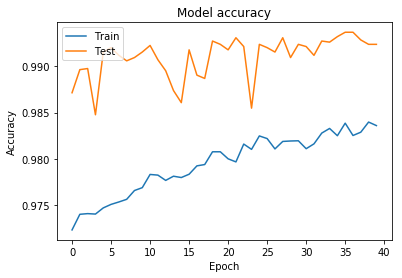

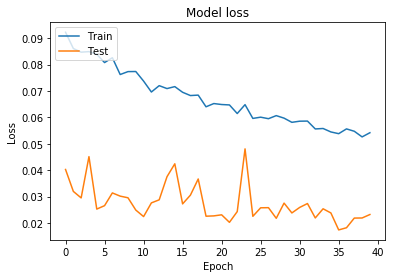

In [129]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [130]:
pred=np.argmax(model.predict(x=test_images),1)
output=np.concatenate((np.arange(1, data_test.shape[0] + 1).reshape(-1, 1),pred.reshape(-1, 1)), axis=1)
output

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ...,
       [27998,     3],
       [27999,     9],
       [28000,     2]])

In [0]:
submission = pd.DataFrame(output, columns=['ImageId', 'Label'])
submission.to_csv('Submission2.csv', index=False)
model.save('deep_cv_nn_1_with_max_pooles.h5')